In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-recommender-system/sample_submission.csv
/kaggle/input/movie-recommender-system/movies.csv
/kaggle/input/movie-recommender-system/imdb_data.csv
/kaggle/input/movie-recommender-system/genome_tags.csv
/kaggle/input/movie-recommender-system/genome_scores.csv
/kaggle/input/movie-recommender-system/train.csv
/kaggle/input/movie-recommender-system/test.csv
/kaggle/input/movie-recommender-system/tags.csv
/kaggle/input/movie-recommender-system/links.csv


# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**2307FTDS_Team_JM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Overview: EA - Movies Recommender Systems
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

...ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?


...it's not just a guess drawn out of the hat. There is an algorithm behind it.

With this context, EA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

##  <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">INTRODUCTION</p>

Recommender systems are amid the most well known applications of data science today. They are used to predict the "rating" or "preference" that a user would possibly give to an item. Recommender systems uses its techniques by searching through large volume of dynamically generated information to provide users with personalized content and services. Technically recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

The objective is to construct a recommender system that employs content or collaborative filtering approaches to accurately forecast a user's rating for a movie they haven't watched, leveraging their past preferences. The aim is to develop a robust and effective solution that holds substantial economic potential, as it enables users to discover and engage with content aligned with their interests, ultimately driving revenue and fostering loyalty to the platform

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Comet</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Loading Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Feature Engineering</a>

<a href=#five>6. Modelling and Model evaluation </a>

<a href=#six>7.Kaggle Submission</a>

<a href=#six>8.Conclusion</a>

<a id="zero"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">1. IMPORTING COMET</p> 
<a href=#cont>Back to Table of Contents</a>

### Comet
Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of our experiments. It allowed us to reproduce our results, or go back to the previous version of our experiments.

Key features:

* Experiment Tracking

* Visualization and Reporting

* Collaboration and Reproducibility

* Experiment with Versioning and Comparison

* Integration and Compatibility

We imported comet_ml for version control by using 'import comet_ml'.

In [2]:
# Installing  comet
!pip install comet_ml

  Obtaining dependency information for comet_ml from https://files.pythonhosted.org/packages/d0/a3/a9cc4cdd1cc4e171b9f612041469b5b5e074d8ac6deacb38c486f48ede6a/comet_ml-3.37.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 5.1 MB/s eta 0:00:00
  Obtaining dependency information for dulwich!=0.20.33,>=0.20.6 from https://files.pythonhosted.org/packages/3c/da/51281ef790c2117520cb52e65fa563c83df9dd8ae7353030e353af13e68f/dulwich-0.21.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.2
    Uninstalling websocket-client-1.6.2:
      Successfully uninstalled websocket-client-1.6.2
ERROR: pip's dependency r

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment


# Create an experiment with your api key
experiment = Experiment(
    api_key="Apr5hXwRa3lUYQy3Zjcs6Wnf6",
    project_name="unsupervised-movie-recommendation-tjm4",
    workspace="tsolonino",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/kaggle/working' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/tsolonino/unsupervised-movie-recommendation-tjm4/68819df0a6914535a0bfdebdbc702ffd



<a id="one"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">2. IMPORTING PACKAGES</p> 
<a href=#cont>Back to Table of Contents</a>

In [4]:
#import packages for data processing and analysis
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import plotly.express as px

# Packages for model building
import scipy.sparse as sp
from scipy import sparse
import surprise
from surprise import Dataset, Reader, SVD
from surprise import accuracy 
from surprise.model_selection import train_test_split
import pickle
import heapq
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convienient item retrieval during iteration
import operator

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">3. LOADING DATA</p>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [5]:
# Loading the data which is stored within kaggle
movies = pd.read_csv('/kaggle/input/movie-recommender-system/movies.csv')
imdb_data = pd.read_csv('/kaggle/input/movie-recommender-system/imdb_data.csv')
genome_scores = pd.read_csv('/kaggle/input/movie-recommender-system/genome_scores.csv')
genome_tags = pd.read_csv('/kaggle/input/movie-recommender-system/genome_tags.csv')
train = pd.read_csv('/kaggle/input/movie-recommender-system/train.csv')
test = pd.read_csv('/kaggle/input/movie-recommender-system/test.csv')
tags = pd.read_csv('/kaggle/input/movie-recommender-system/tags.csv')
links = pd.read_csv('/kaggle/input/movie-recommender-system/links.csv')
sample_submission = pd.read_csv('/kaggle/input/movie-recommender-system/sample_submission.csv')

<a id="three"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">4. EXPLORATORY DATA ANALYSIS</p>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Data Description

In [6]:
#check the structure and features of the movies dataset.
movies.info()
# looking at the first five rows of the movie dataset
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The movies dataset has 3 features which are movieId, title of the movie and the genre of the movie. It can be observed that the movie genres are pipe seperated indicating that they can be seperated to single genres and the title of the movie includes the year it was realeased.

In [7]:
# Check for null values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

It can be seen that the mivies data contains non-null values only. 

In [8]:
#check the structure and features of the imdb dataset.
imdb_data.info()
# looking at the first five rows of the imdb dataset
imdb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


The data has 6 features, the movieId, the cast that was featured in the movie, the director of the movie, the time it takes for the movie to play, the budget of the movie and the plot keywords that can be used to describe the theme of the movie.The cast and the plot keywords are pipe seperated.

In [9]:
# Check for null values
imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

It can be observed that almost all the features contains a certain percentage of null values, the highest feature being the budget feature, probably because the budget of the movie was not disclosed. 

In [10]:
#check the structure and features of the tags dataset.
tags.info()
# looking at the first five rows of the tags dataset
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


The data has 4 features, the userId which has the unique ID for every customer, and movieId has the unique identification number for every movie, and tags which describes the movie and the timestamp encoded information identifying when a certain event occurred, usually giving date and time of day.

In [11]:
#check the structure and features of the train dataset.
train.info()
# looking at the first five rows of the tags dataset
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The dataset has similar features to the tags dataset except tha rating feature which contains the rating given by the particular user to the movie out of 5.

In [12]:
# Determine the unique values for users and movies in the dataset
users = len(train.userId.unique())
items = len(train.movieId.unique())
print('There are {} unique users and {}\
 unique movies train dataset with {} duplicated entries'.format(users, items, train[train.duplicated()].count().sum()))

There are 162541 unique users and 48213 unique movies train dataset with 0 duplicated entries


### Imdb Data

In [13]:
#spliting the title cast into a list
imdb_data['title_cast']=imdb_data['title_cast'].str.split('|')

#spliting the Keywords into a list
imdb_data['plot_keywords']=imdb_data['plot_keywords'].str.split('|')

imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


In [14]:
# converting director names  and title cast into smaller letters and drop nan values.
imdb_data['director'] = imdb_data['director'].apply(lambda x: x.lower() if x == x else np.nan)

In [15]:
# For easy analysis and building wordcloud
imdb_data['plot_keywords'] = imdb_data['plot_keywords'].dropna()

In [16]:
# checking implimented changes
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",john lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",jonathan hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",mark steven johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",terry mcmillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",albert hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


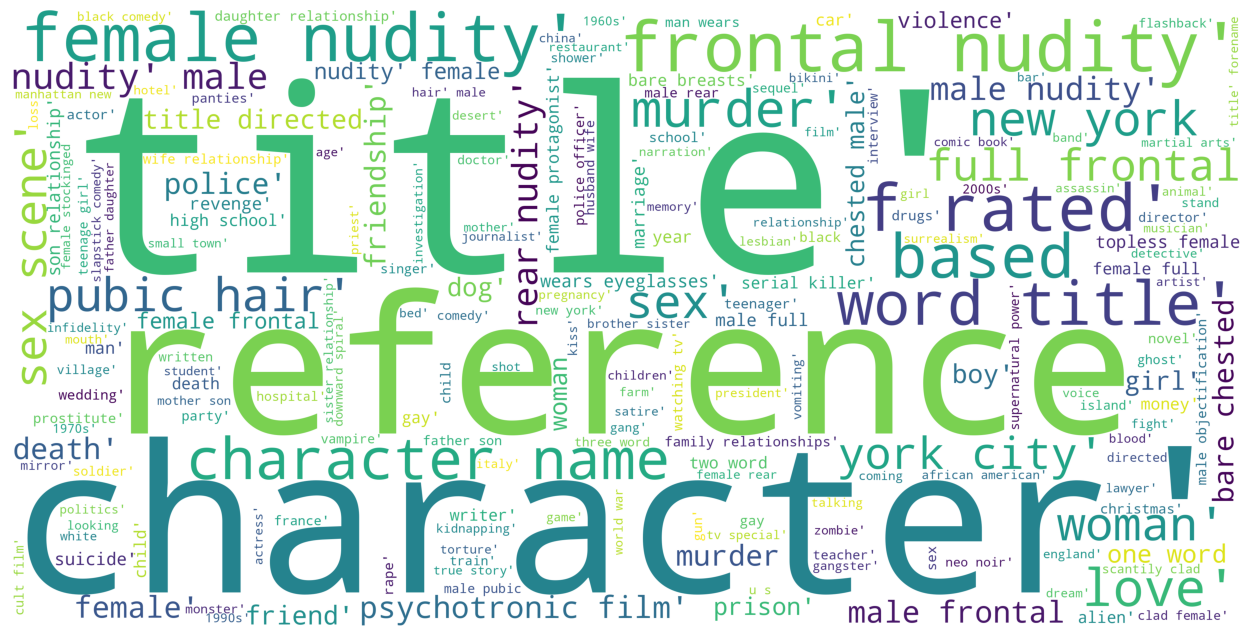

In [17]:
# Generate wordcloud for the plot keywords of movies
plot_cloud = imdb_data.loc[:,'plot_keywords'] = imdb_data.loc[:, 'plot_keywords'].astype(str)
plot_cloud.dropna()
plot_cloud = [x for x in plot_cloud if str(x) != 'nan']
title_corpus = ' '.join(movies['title'])
plot_corpus = ' '.join(plot_cloud)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(plot_corpus)
plt.figure(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.show()

This word cloud helps us analyze the popular plotlines among the viewers. Basically, the bigger and bolder the word is, the more frequently it is used and the more relevant it is in a given textual document (description of plots, in our case). Therefore, from the word cloud generated from our dataset, we can understand that stories/plots revolving around themes like nudity, female, love, character, reference and etc. 

### Genres 

In [18]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head(10)

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


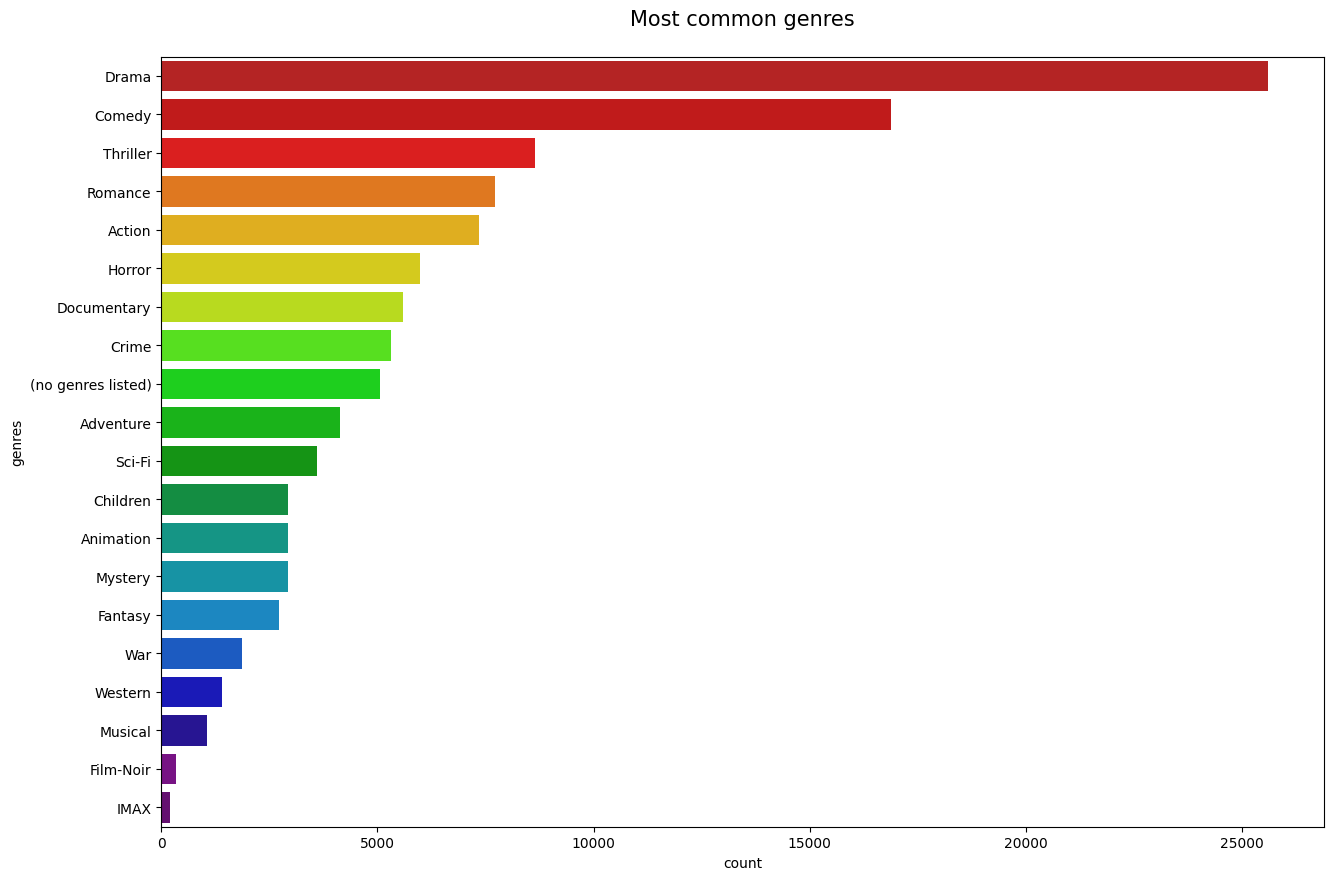

In [19]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=15)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette="nipy_spectral_r")
plt.show()

Drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film. The second one Comedy followed by Thriller, Romance, Action, Horror, Documentary, Crime, Adventure, Science Fiction, Children, Animation, Mystery and Fantasy. IMAX is the least common genre as it is the most expensive so fewer people watch it, it is also only available at the cinema and not streaming platforms such as Netflix.

### Ratings

Average rating in the dataset: 3.5333951730983424


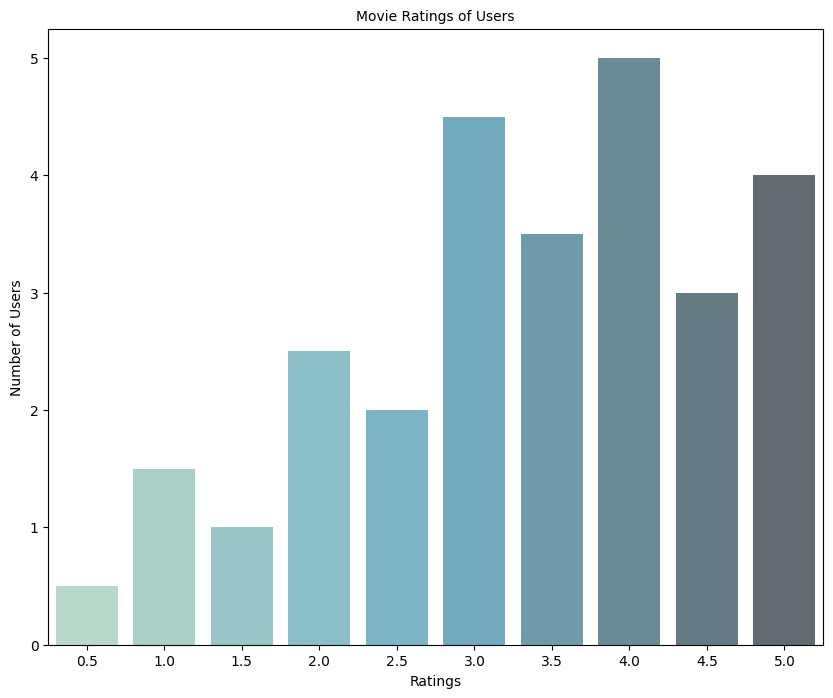

In [20]:
# Determine the average rating among users.
print (f'Average rating in the dataset: {np.mean(train["rating"])}')

#bar graph plot to show the ratings of movies given by users
cnt_srs = train['rating'].value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=cnt_srs.values, y=cnt_srs.index, alpha=0.8,palette='GnBu_d')
plt.title('Movie Ratings of Users', fontsize=10)
plt.ylabel('Number of Users', fontsize=10)
plt.xlabel('Ratings', fontsize=10)
plt.xticks([0,1,2,3,4,5,6,7,8,9],['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0'])
plt.show()

The mean rating of approx 3.5 shows that users typically lean towards more favourable ratings and are not excessively harsh in their criticism. There are relatively few ratings below 2.0. An alternative explanation could be that users tend to only rate those movies that they enjoy. Many users might terminate an unenjoyable movie mid-stream without bothering to give it a rating. I've personally walked out of a cinema just 15 minutes into the showing of a junk movie, figuring I can make better use of my valuable time and simply deeming the purchase of my movie ticket as a sunk cost. The mode ranking in the chart above is 4.0. It appears that users tend to provide whole-number ratings (e.g. 4.0) as opposed to fractional ratings (e.g. 3.5).

In [21]:
# Merge train (users) and movies datasets on movieId column
train_movies_df = pd.merge(train,
                           movies,
                           how='left',
                           on='movieId')

# Perform a further merge with imdb_data on movieId column
movies_metadata_df = pd.merge(train_movies_df,
                              imdb_data,
                              how='left',
                              on='movieId')

movies_metadata_df.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,"[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",martin mcdonagh,107.0,"$15,000,000","['dwarf', 'bruges', 'irish', 'hitman']"
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,"[Steve Martin, Diane Keaton, Martin Short, Kim...",albert hackett,106.0,"$30,000,000","['fatherhood', 'doberman', 'dog', 'mansion']"
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,"[Tommy Lee Jones, Will Smith, Rip Torn, Lara F...",lowell cunningham,88.0,"$140,000,000","['lingerie', 'michael jackson character', 'sho..."
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,"[Sandra Bullock, Regina King, Enrique Murciano...",marc lawrence,115.0,"$45,000,000","['female protagonist', 'cleave gag', 'good wom..."
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,"[Jeff Davis, Heather Langenkamp, Miko Hughes, ...",wes craven,112.0,"$8,000,000","['freddy krueger', 'elm street', 'famous direc..."


In [22]:
# Calculate average rating for each movie title and arrange from highest to lowest
movies_ranking = movies_metadata_df[['title','rating']].groupby('title').mean().sort_values('rating', ascending=False)

In [23]:
# View the new dataframe movies_ranking
movies_ranking.head(5)

,rating
title,
Which Way Home (2009),5.0
Kaakha Kaakha (2003),5.0
Not Quite Human II (1989),5.0
Selling Isobel (2018),5.0
Sehar (2005),5.0


In [24]:
# Ading a new column called 'No_of_ratings' to a DataFrame named movies_ranking. The values in this new column represent the count of ratings for each movie title in another DataFrame named movies_metadata_df
movies_ranking['No_of_ratings'] = movies_metadata_df.groupby('title')['rating'].count()

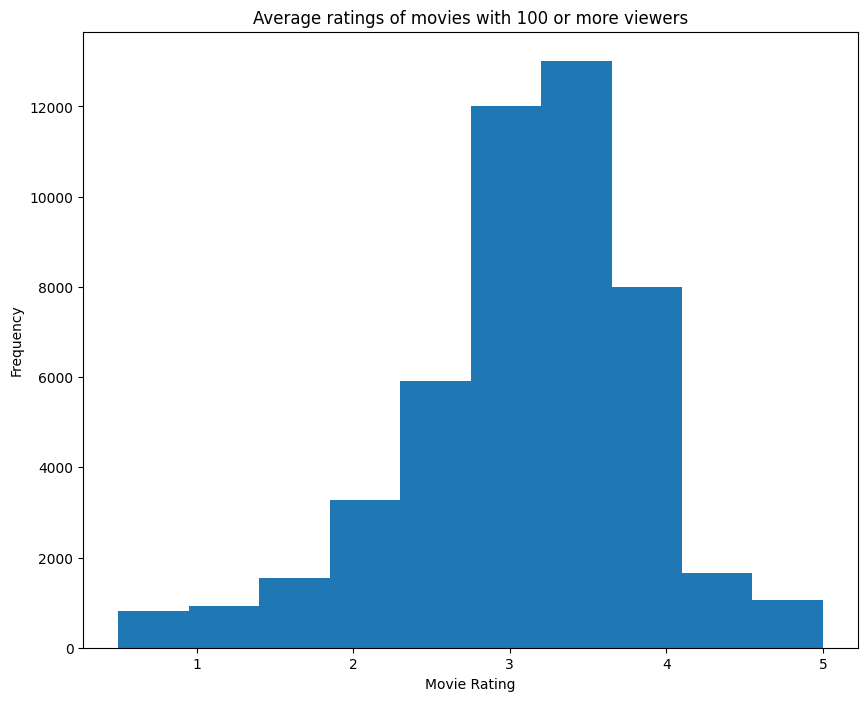

In [25]:
# Average rating of movies in the dataset
avg_rating = train.groupby('movieId')['rating'].mean()

# Plotting the results
plt.figure(figsize=(10,8))
avg_rating.plot(kind='hist')
plt.ylabel('Frequency')
plt.xlabel('Movie Rating')
plt.title('Average ratings of movies with 100 or more viewers')
plt.show()

The high number/count of ratings can be seen to be centred around the rating 3 and 4.Most people rated the movie between 3 and 4 because they probably felt that a rating of 5 would be overrating the movie. 

In [26]:
# The table below shows the correlation between ratings count and rating (score) for each movie director
best_director = pd.DataFrame(movies_metadata_df.groupby('director')['rating'].mean().
                             sort_values(ascending=False))
best_director['No_of_ratings'] = movies_metadata_df.groupby('director')['rating'].count()
best_director.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head(10)

,rating,No_of_ratings
director,,
quentin tarantino,3.936571,109919
michael crichton,3.273370,65157
j.r.r. tolkien,4.080118,62963
lilly wachowski,3.808348,60988
stephen king,4.049956,59903
ethan coen,3.947250,51185
james cameron,3.687102,51178
luc besson,3.749676,44015
jonathan nolan,4.100516,42645


The table reflects the top 10 directors. The directors whose movies have received the most number of ratings typically also get higher rating scores for their movies.This could simply mean people rate the movie based on their favourite director and not the content of the movie. 

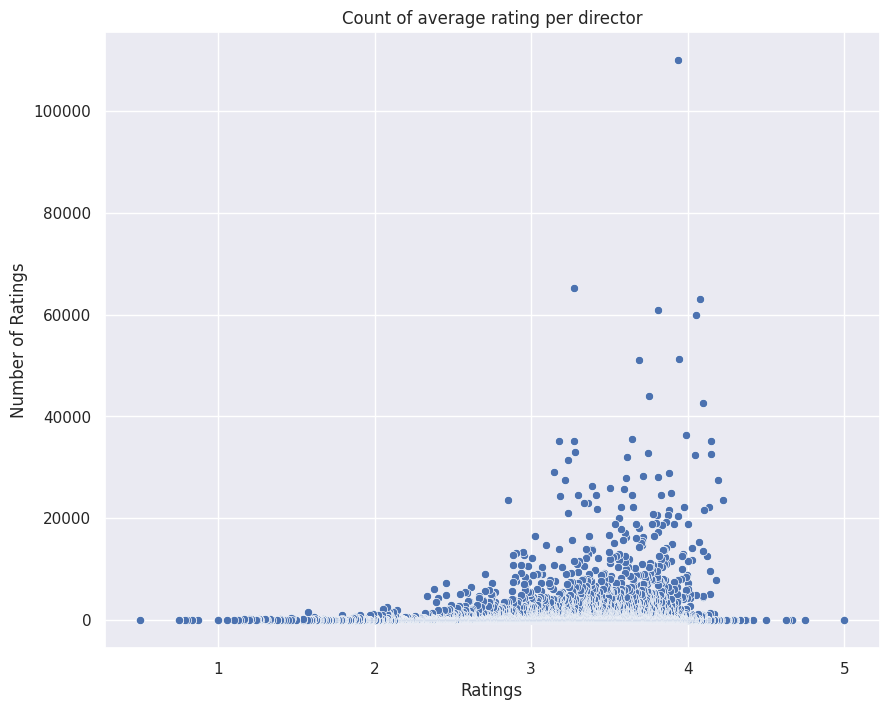

In [27]:
# A visual indication of the correlation between number of ratings and rating scores for directors.

sns.set(rc={'figure.figsize':(10,8)})

sns.scatterplot(x = 'rating', y = 'No_of_ratings', data = best_director).set_title('Count of average rating per director')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

A majority of people gave a rating of above 2.5. The directors with the highest number of ratings, they were also given a rating of 3 and 4. This might be because the directors are consistent in their taste and deliver what their target audience want. 

In [28]:
# looking at the average of ratings the different genres has.
Genres = pd.DataFrame(movies_metadata_df.groupby('genres')['rating'].mean().
                             sort_values(ascending=False))
Genres['No_of_ratings'] = movies_metadata_df.groupby('genres')['rating'].count()
Genres.sort_values(by=['No_of_ratings', 'rating'], ascending=False).head()

,rating,No_of_ratings
genres,,
Drama,3.692465,706335
Comedy,3.247779,606057
Comedy|Romance,3.374743,360826
Drama|Romance,3.668020,318408
Comedy|Drama,3.567830,288847


Since drama is the most commonly occurring genre with almost half the movies identifying itself as a drama film, it is considered to have the most number of ratings with an average rating of 3.6. This shows that it is the most viewed genre this might be because it has the ability  to evoke strong audience emotions.

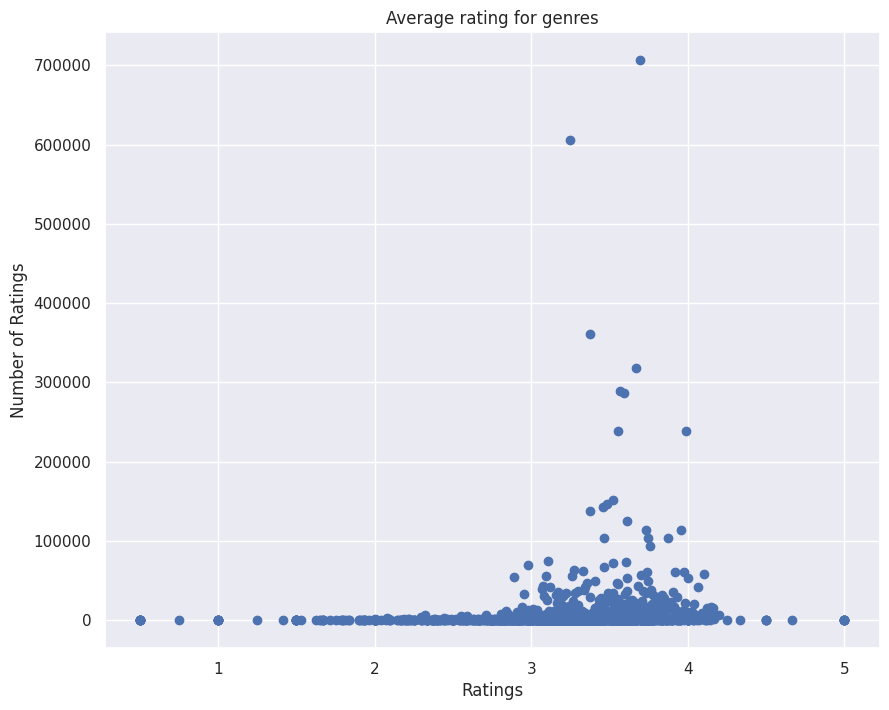

In [29]:
# Plotting the relationship between the number of rating and rating scores for different genres
plt.figure(figsize=(10, 8))
plt.scatter(Genres['rating'], Genres['No_of_ratings'])
plt.title('Average rating for genres')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

The plot is consistent with the plots for directors and movie title, which illustrates that that the genres with the highest number of ratings/views, have ratings btween 3 and 4. This therefore leads to the conclusion that the number of ratings/views and rating scores have a directly proportional relationship.

### Movies

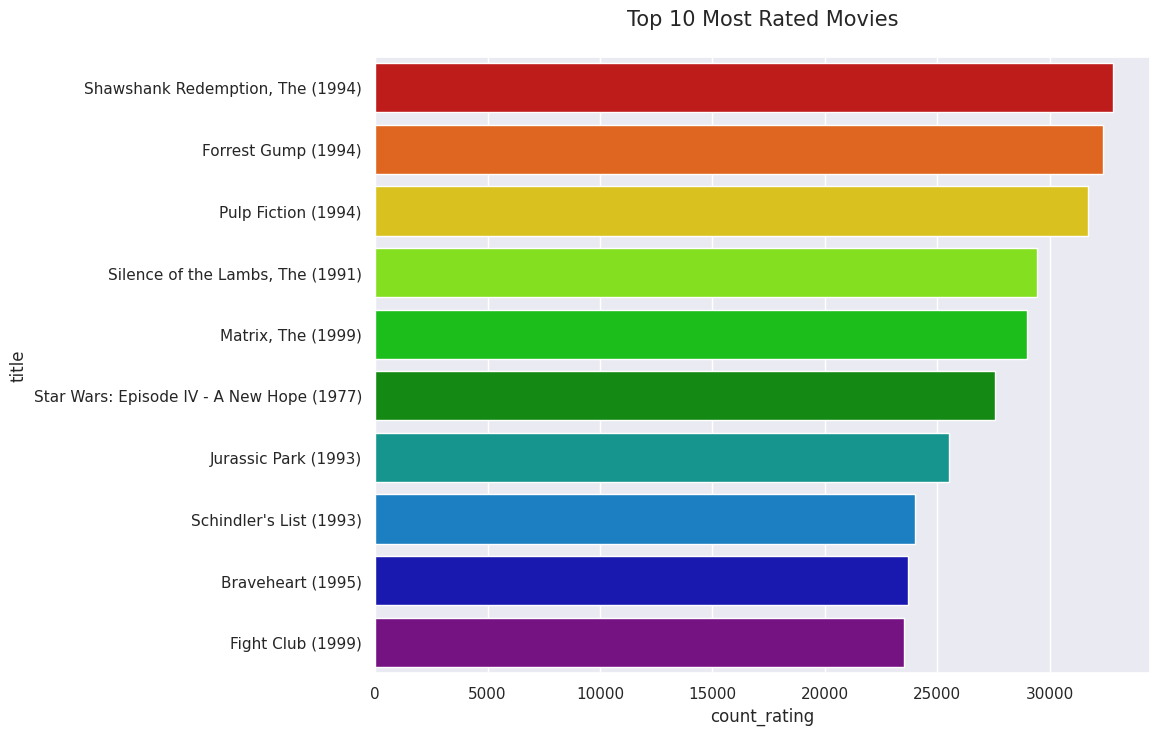

In [30]:
# The top 10 Most Rated Movies
data = train.groupby('movieId')['rating'].size().sort_values(ascending=False)
da = {'count_rating': data.values, 'movieId': data.index}

# Create DataFrame.
df = pd. DataFrame(da)
df = df[:10]
df = pd.merge(df,movies)

# Plot the 10 Most Rated Movies
plot = plt.figure(figsize=(10, 8))
plt.title('Top 10 Most Rated Movies\n', fontsize=15)
sns.barplot(y="title", data=df,
              x = 'count_rating',
              palette="nipy_spectral_r")
plt.show()

The most rated movie 'The Shawshank redemption' is a thriller/crime movie and based on the 1982 Stephen King novella who is a director and in our dataset has a rating score of 4.04. It is a movie about Andy Dufresne (Tim Robbins) who is sentenced to two consecutive life terms in prison for the murders of his wife and her lover and is sentenced to a tough prison. However, only Andy knows he didn't commit the crimes. While there, he forms a friendship with Red (Morgan Freeman), experiences brutality of prison life, adapts, helps the warden, etc., all in 19 years. It truly is a timeless movie.

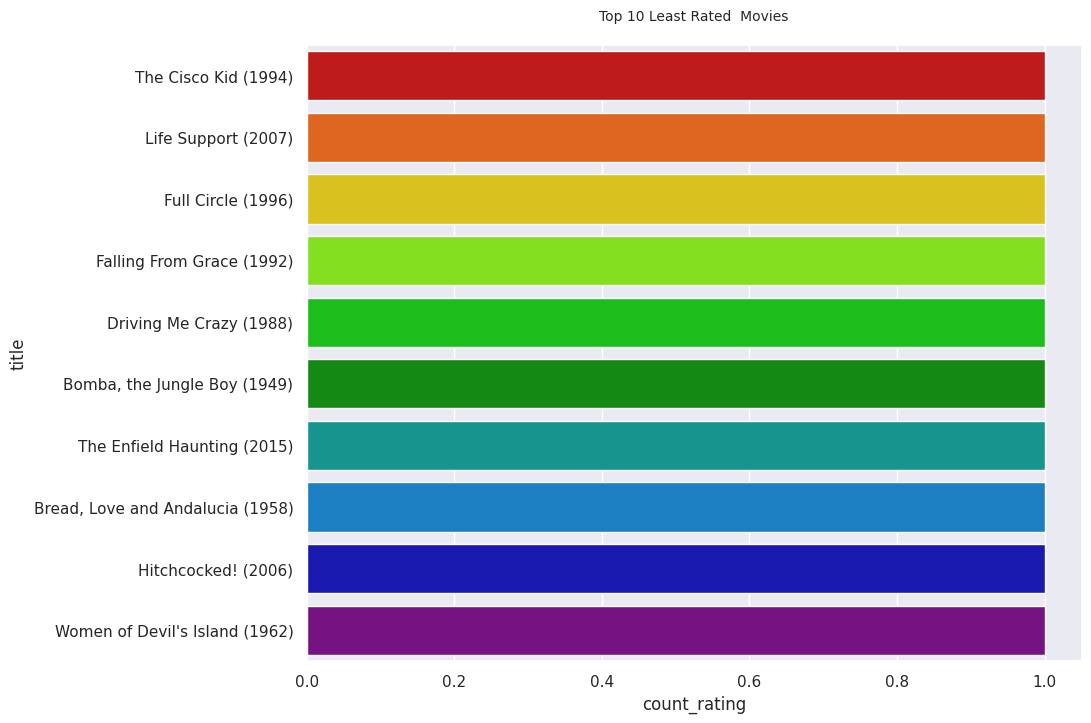

In [31]:
# Top 10 Least Rated Movies
data = train.groupby('movieId')['rating'].size().sort_values(ascending=False)
da = {'count_rating': data.values, 'movieId': data.index}
# Create DataFrame.
df = pd. DataFrame(da)
df = df[-10:]
df = pd.merge(df,movies)

# Plot the 10 Least Rated Movies
plot = plt.figure(figsize=(10, 8))
plt.title('Top 10 Least Rated  Movies\n', fontsize=10)
sns.barplot(y="title", data=df,
              x = 'count_rating',
              palette="nipy_spectral_r")
plt.show()

The movies with the lowest ratings are movies that mostly portray strange situations, surprises, surrealism, plot twists, black humor. The assumption is that a large number of people are not comfortable with those type of movies leading to them having poor rating score. 

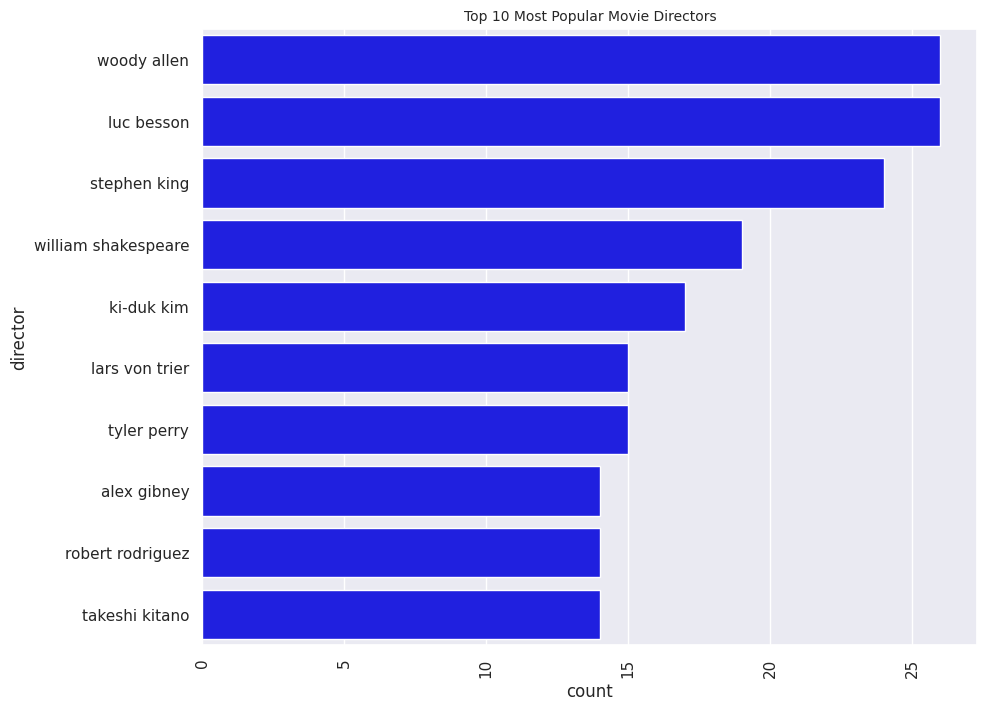

In [32]:
#Plotting the top 10 movie directors using a count-plot
plt.figure(figsize = (10,8))
director=imdb_data['director']
axes=sns.countplot(y=director, order = director.value_counts().index[1:11],color='blue')
axes.set_title('Top 10 Most Popular Movie Directors',fontsize=10)
plt.xticks(rotation=90)
plt.show()

A number of popular directors based on the number of movies they have directed. It can be observe that the most popular movie directors are woody allen and Luc Besson with the same number of count. They both have received awards for best director. Woody has directed a popular movie such as Coup de chance and Luc has directed a popular movie such as the Transporter and from our dataset he has recived a rating score of 3.7 which is above average. 

In [33]:
imdb_data = pd.read_csv('/kaggle/input/movie-recommender-system/imdb_data.csv')

In [34]:
imdb_data['title_cast']=imdb_data['title_cast'].fillna("Unknown")
imdb_data['plot_keywords']=imdb_data['plot_keywords'].fillna("Unknown")

# Create dataframe containing only the movieId and title cast
title_cast = pd.DataFrame(imdb_data[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])
# Create dataframe containing only the movieId and keywords
plot_keywords = pd.DataFrame(imdb_data[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
title_cast.title_cast = title_cast.title_cast.apply(lambda x: x.split('|'))
plot_keywords.plot_keywords = plot_keywords.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
title_cast = pd.DataFrame([(tup.movieId, d) for tup in title_cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])
plot_keywords = pd.DataFrame([(tup.movieId, d) for tup in plot_keywords.itertuples() for d in tup.plot_keywords],
                             columns=['movieId', 'plot_keywords'])


title_cast.head()

,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


In [35]:
# Filtering by selecting rows from the DataFrame title_cast where the values in the title_cast column are not equal to "Unknown".
title_cast=title_cast[title_cast!= "Unknown"]
title_cast

,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn
...,...,...
249353,131262,Mikal Evans
249354,131262,Daniel Zovatto
249355,131262,Evelina Turen
249356,131262,Rachel Heller


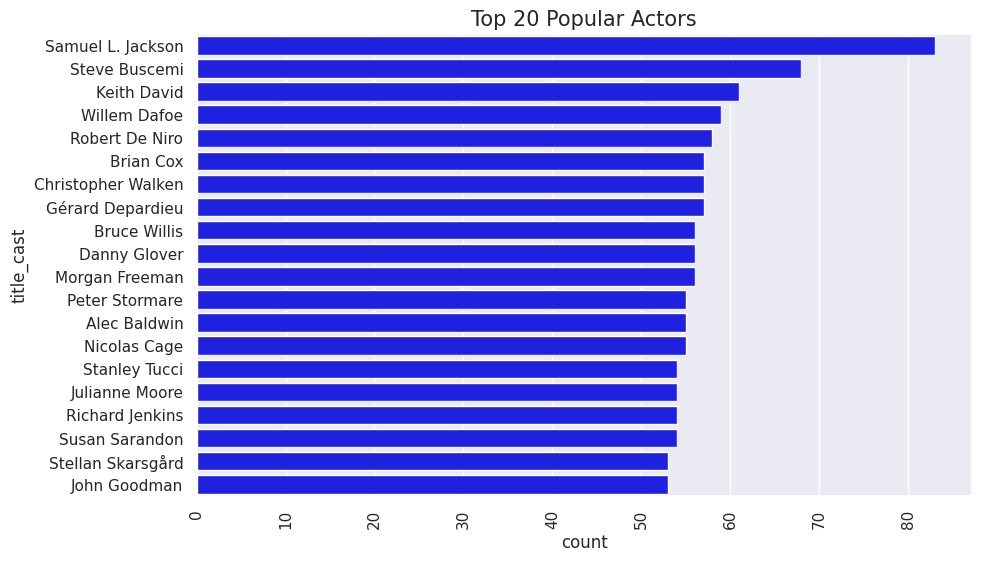

In [36]:
#Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=title_cast.title_cast.explode()
ax=sns.countplot(y=title_cast, order = title_cast.value_counts().index[:20],color='blue')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Samuel L Jackson seems to be the most popular actor since he appeared in over 80 movies from the dataset. It could be that he stars/features in so many movies because he is a big enough name that any production will schedule around him. Additionally, he is talented,versatile,funny and experienced enough to work more quickly than many other actors.

<a id="four"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">5. FEATURE ENGINEERING</p> 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [37]:
# Extract release date (year) from movie titles

# Use regular expression to extract year from paranthesis in movie title 
movies["year"] = movies.title.str.extract("\((\d{4})\)", expand=True)
# Remove parentheses so only year is extracted
movies["year"] = movies.year.str.extract("(\d\d\d\d)", expand=True)
# Remove year from the title column
movies["title"] = movies.title.str.replace("(\(\d\d\d\d\))", "")
# Strip any ending whitespace characters
movies["title"] = movies["title"].apply(lambda x: x.strip())

In [38]:
# checking the implemented changes
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


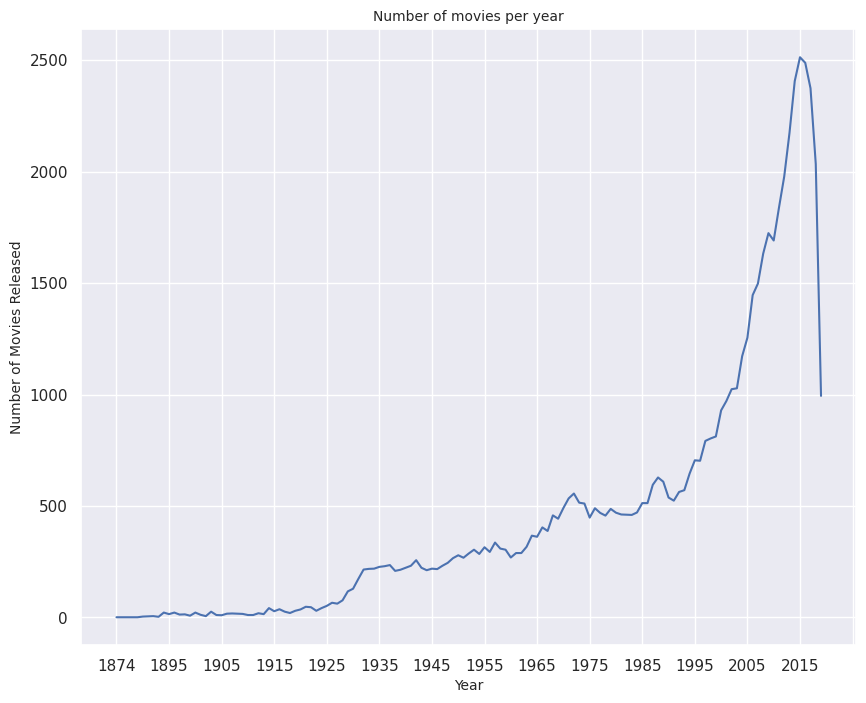

In [39]:
# Calculating the number of movies released each year
year_counts = movies[["title", "year"]].groupby("year").size()

fig, ax = plt.subplots(figsize=(10, 8)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.title("Number of movies per year", fontsize=10)
plt.xlabel("Year", fontsize= 10)
plt.ylabel("Number of Movies Released", fontsize=10)
plt.show()

We see that as the years go by, the total number of movies released per year increased. This might be from the fact that as the technology advances, the more movies are released and also more money is generated through the movie industries so everyone will want to release their movies. More mvies were realesed in the 2000's year. 

In [40]:
# Convert the timestamp values into datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='ms')
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1970-01-18 13:45:49.992
1,106343,5,4.5,1970-01-14 23:03:58.739
2,146790,5459,5.0,1970-01-13 10:56:55.539
3,106362,32296,2.0,1970-01-17 11:17:22.565
4,9041,366,3.0,1970-01-10 15:29:35.837


In [41]:
# Extract the day of the week from the newly-formatted timestamp column
train['day_of_week'] = train['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
train['day_of_week'] = train['day_of_week'].apply(lambda x: days[x])
train.tail()

,userId,movieId,rating,timestamp,day_of_week
10000033,136395,99114,5.0,1970-01-18 14:33:55.092,Sun
10000034,140078,553,3.0,1970-01-12 14:29:40.977,Mon
10000035,154807,56782,4.0,1970-01-15 05:01:14.807,Thur
10000036,85805,327,4.0,1970-01-18 03:05:21.530,Sun
10000037,139457,1009,4.0,1970-01-10 22:36:24.862,Sat


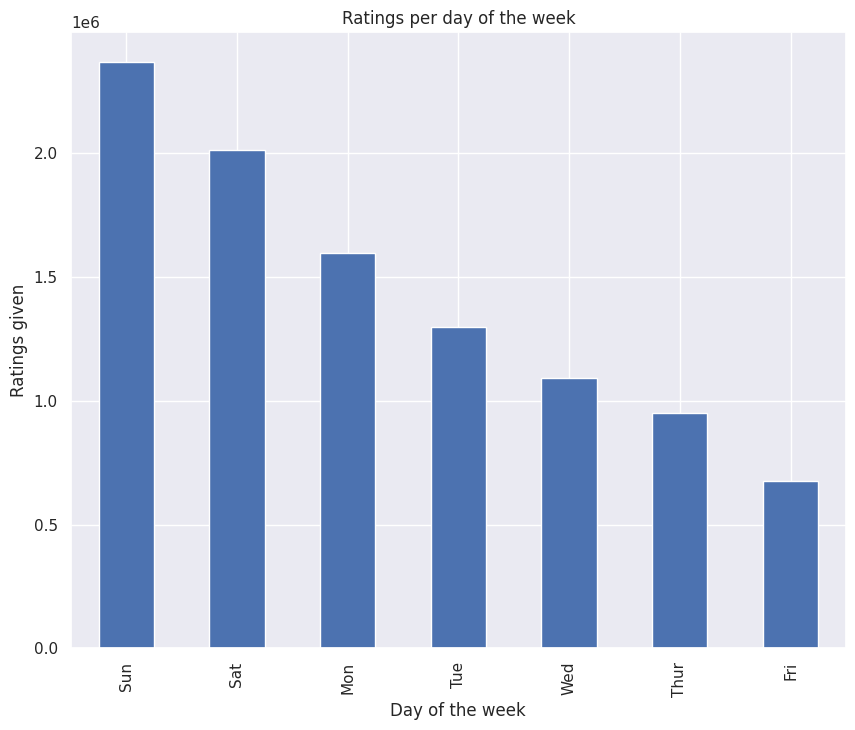

In [42]:
# Plot number of ratings by day of week
train['day_of_week'].value_counts().plot(kind='bar')
plt.title('Ratings per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Ratings given')
plt.show()

Observing the average rating for each day of the week, it can be see that  most ratings are recived on Sunday and Saturday. As that would be the time that users are more settled at home, off from work and spending time with family and resting by watcing different movies. 

<a id="five"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">6. MODELLING AND MODEL EVALUATION</p> 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Collaborative Filtering

Collaborative filtering (CF) is a machine learning technique used by recommender systems. It  filters information by using the interactions and data collected by the system from other users. It’s based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future.Collaborative-filtering systems focus on the relationship between users and items. The similarity of items is determined by the similarity of the ratings of those items by the users who have rated both items.

The two types of collaborative filtering are:
* User-based, which measures the similarity between target users and other users.
* Item-based, which measures the similarity between the items that target users rate or interact with and other items.

**Advantages**
* **No domain knowledge necessary**
We don't need domain knowledge because the embeddings are automatically learned.

* **Serendipity**
The model can help users discover new interests. In isolation, the ML system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.

* **Great starting point**
To some extent, the system needs only the feedback matrix to train a matrix factorization model. In particular, the system doesn't need contextual features. In practice, this can be used as one of multiple candidate generators.

**Disadvantages**

* **Cannot handle fresh items**
The prediction of the model for a given (user, item) pair is the dot product of the corresponding embeddings. So, if an item is not seen during training, the system can't create an embedding for it and can't query the model with this item. This issue is often called the cold-start problem. However, the following techniques can address the cold-start problem to some extent:

* **Hard to include side features for query/item**
**Side features** are any features beyond the query or item ID. For movie recommendations, the side features might include country or age. Including available side features improves the quality of the model. Although it may not be easy to include side features in WALS, a generalization of WALS makes this possible.

![CollabUrl](https://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif "collab")

In [43]:
%%time

# The reader is required because the dataset uses a rating scale of 0.5-5 which is non-standard(default is 1-5)
cols = ['userId', 'movieId','rating']
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train[cols],reader)

# Split the dataset into training and testing sets(validationset(20%))
trainset, validationset = train_test_split(data, test_size=0.2, random_state=42)

CPU times: user 35.1 s, sys: 1.19 s, total: 36.3 s
Wall time: 36.3 s


### Singular Value Decomposition(SVD) Model


In [44]:
# initialize the model
model = SVD(verbose = True, random_state = 50, lr_all = 0.01, biased = True,n_factors = 90, reg_all = 0.1,n_epochs = 50)

In [45]:
%%time

# Train the model 
model.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
CPU times:

In [46]:
# make a prediction to evaluate the model by using the 20% test data
prediction = model.test(validationset)

Model performance refers to how well a machine learning model performs on a given task or dataset. It is a measure of the model's ability to make accurate predictions. Evaluating model performance is crucial for assessing the effectiveness of the models and determining its suitability for the intended use. We will assess the model performance using the Root Mean Square Error(RMSE):

In [47]:
# Evaluate the model performance using the root mean square error

rmse_value = accuracy.rmse(prediction)

RMSE: 0.8297


A RMSE value of 0.829 suggests that, on average, the model's predictions deviate from the actual values by approximately 0.829 units.

In [48]:
metrics = {
    'Root Mean Square Error': rmse_value
}
experiment.log_metrics(metrics)

In [49]:
# set the hyper parametere

hyper_params = {
    "biased": True,
    "learning_rate": 0.01,
    "verbose": True,
    "random_state": 50,
    "n_factors":90,
    "n_epochs": 50,
    "reg_all":0.1
}

# log the hyparameters for this experiment
experiment.log_parameters(hyper_params)

In [50]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/tsolonino/unsupervised-movie-recommendation-tjm4/68819df0a6914535a0bfdebdbc702ffd
COMET INFO:   Metrics:
COMET INFO:     Root Mean Square Error : 0.8297328098030675
COMET INFO:   Parameters:
COMET INFO:     biased        : True
COMET INFO:     learning_rate : 0.01
COMET INFO:     n_epochs      : 50
COMET INFO:     n_factors     : 90
COMET INFO:     random_state  : 50
COMET INFO:     reg_all       : 0.1
COMET INFO:     verbose       : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environ

### Movie Recommendations and Rating prediction

In [51]:
#The movies that 146790 has watched before
merge = pd.merge(train,movies)

User_146790 = merge[merge['userId'] == 146790]
User_146790.head()

,userId,movieId,rating,timestamp,day_of_week,title,genres,year
8901,146790,5459,5.0,1970-01-13 10:56:55.539,Tue,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi,2002
132222,146790,4993,5.0,1970-01-13 10:56:55.248,Tue,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,2001
470416,146790,6377,4.5,1970-01-13 10:55:29.299,Tue,Finding Nemo (2003),Adventure|Animation|Children|Comedy,2003
879239,146790,3005,4.5,1970-01-13 10:56:55.798,Tue,"Bone Collector, The (1999)",Thriller,1999
887410,146790,2424,3.5,1970-01-13 10:55:30.141,Tue,You've Got Mail (1998),Comedy|Romance,1998


In [52]:
#Getting reccomended movies for 146790 user
movie = movies.copy()

movie['predicted_ratingscore'] = movie['movieId'].apply(lambda x: model.predict(146790, x).est)
movie = movie.sort_values(by=['predicted_ratingscore'], ascending=False)

#Top ten recommended movies for UserId 146790
movie.head(10)

,movieId,title,genres,year,predicted_ratingscore
61209,205277,Inside Out (1991),Comedy|Drama|Romance,1991,5.000000
60573,203633,The Bribe (2018),Comedy|Crime,2018,5.000000
54254,189159,Born in the USSR: 14 Up (1998),(no genres listed),1998,5.000000
16298,86288,"Day the Universe Changed, The (1985)",Documentary,1985,4.978482
39260,156781,Jimmy Carr: Telling Jokes (2009),Comedy,2009,4.898753
46075,171705,Den radio (2001),(no genres listed),2001,4.873799
19789,102823,As I Was Moving Ahead Occasionally I Saw Brief...,Documentary,2000,4.871369
27322,128862,Casanova (2005),Comedy|Drama|Romance,2005,4.864454
19598,101801,"Skylab, Le (2011)",Comedy|Drama,2011,4.849809
33530,143377,Glen Campbell: I'll Be Me (2014),Documentary|Drama,2014,4.823275


In [53]:
#The movies that 9041 has watched before
merge = pd.merge(train,movies)

User_9041 = merge[merge['userId']==9041]
User_9041.head()

,userId,movieId,rating,timestamp,day_of_week,title,genres,year
15289,9041,366,3.0,1970-01-10 15:29:35.837,Sat,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller,1994
99415,9041,150,5.0,1970-01-10 15:29:35.083,Sat,Apollo 13 (1995),Adventure|Drama|IMAX,1995
493582,9041,296,5.0,1970-01-10 15:29:35.083,Sat,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
574249,9041,590,5.0,1970-01-10 15:29:35.083,Sat,Dances with Wolves (1990),Adventure|Drama|Western,1990
897948,9041,434,3.0,1970-01-10 15:29:35.153,Sat,Cliffhanger (1993),Action|Adventure|Thriller,1993


In [54]:
#Getting reccomended movies for 9041 user
movie = movies.copy()

movie['predicted_ratingscore'] = movie['movieId'].apply(lambda x: model.predict(9041, x).est)
movie = movie.sort_values(by=['predicted_ratingscore'], ascending=False)

#Top ten recommended movies for UserId 9041
movie.head(10)

,movieId,title,genres,year,predicted_ratingscore
49559,179135,Blue Planet II (2017),Documentary,2017,5.0
49200,178353,Nothing But a Man (1964),Drama,1964,5.0
56389,194060,Uninvited (1988),Horror|Sci-Fi,1988,5.0
24137,120761,By the Law (1926),Drama,1926,5.0
57304,196067,The Dawn Wall (2018),Adventure|Documentary,2018,5.0
38787,155665,We Have Only One Life (1958),Comedy|Drama,1958,5.0
8542,26048,"Human Condition II, The (Ningen no joken II) (...",Drama|War,1959,5.0
20483,105952,Spinning Plates (2012),Documentary,2012,5.0
38789,155671,"Learn How to Read and Write, Son (1981)",Comedy|Drama,1981,5.0
12462,60256,Goddess (Devi) (1960),Drama,1960,5.0


In [55]:
%%time

test['Id'] = test['userId'].astype(str) +'_'+ test['movieId'].astype(str)


#Predictions using the test dataset
test['ratings_SVD']= test.apply(lambda x: model.predict(x['userId'],x['movieId']).est,axis =1)


CPU times: user 1min 15s, sys: 1.09 s, total: 1min 17s
Wall time: 1min 16s


In [56]:
%%time

# set the name for the model
filename = 'svd_model.pkl'

# save the actual model
with open(filename, 'wb') as file:
    pickle.dump(model, file)

CPU times: user 10.8 s, sys: 533 ms, total: 11.4 s
Wall time: 11.4 s


In [57]:
%%time

# load the model to perform some operations and see if its actually working
filename = 'svd_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

CPU times: user 2.21 s, sys: 782 ms, total: 2.99 s
Wall time: 2.98 s


### Collaborative Filtering using Matrix Factorization

The goal of collaborative filtering recommendation engines is to fill in the gaps in a utility matrix since not every user has rated every item, and then output the top-rated, previously-unrated items as recommendations.

In [58]:
def delete_random_rows(df, target_size):
    current_size = len(df)
    
    while current_size > target_size:
        num_rows_to_delete = current_size - target_size
        rows_to_delete = df.sample(n=num_rows_to_delete, random_state=42).index
        df = df.drop(rows_to_delete)
        current_size = len(df)
    
    return df

In [59]:
trained = delete_random_rows(train, 50000)

In [60]:
trained.shape

(50000, 5)

In [61]:
util_matrix = trained.pivot_table(index=['userId'], 
                                       columns=['movieId'],
                                       values='rating') 
util_matrix.shape

(34266, 7763)

In [62]:
# Normalize each row (a given user's ratings) of the utility matrix
util_matrix_norm = util_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]

# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sparse.csr_matrix(util_matrix_norm.values)

In [63]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity, 
                           index = util_matrix_norm.columns, 
                           columns = util_matrix_norm.columns)

In [64]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular movies in the item catalog.
    
    if user not in user_sim_df.columns:
        return trained.groupby('movieId').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()
    
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    
    # List of highest rated items gathered from the k users
    favorite_user_items = [] 
    # Dictionary of highest rated items in common for the k users
    most_common_favorites = {} 
    
    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())
        
    # Loop over each user's favorite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]: 
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N  

In [65]:
# recommend movies using movieId
#collab_generate_top_N_recommendations(user=11111, N=10, k=20)

In [66]:
def collab_generate_rating_estimate(movieId, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:k+1]
    
    # List of k user's ratings for the reference item
    rating_list = [] 
    # List of k user's similarities to the reference user
    weight_list = [] 
    
    # Create a weighted sum for each of the k users who have rated the 
    # reference item (movie).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, movieId]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list) 
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[movieId])
    return predicted_rating

In [67]:
trained.head(10)

,userId,movieId,rating,timestamp,day_of_week
37,20435,187593,5.0,1970-01-18 21:51:33.321,Sun
184,50335,45517,5.0,1970-01-17 23:22:41.432,Sat
443,147944,260,4.0,1970-01-11 04:16:53.023,Sun
617,57548,5110,3.0,1970-01-18 01:15:30.932,Sun
814,111311,4745,2.0,1970-01-15 09:57:03.663,Thur
917,61737,3266,4.0,1970-01-12 19:16:06.030,Mon
1658,67299,3167,4.0,1970-01-12 04:23:36.662,Mon
1755,141481,553,3.0,1970-01-10 19:54:25.836,Sat
1803,31933,6533,4.0,1970-01-14 17:07:54.387,Wed
2607,4286,161,3.0,1970-01-10 15:07:50.239,Sat


In [68]:
collab_generate_rating_estimate(movieId=57669, user=4286, k=20, threshold=0.0)

3.6153846153846154

### Content based filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback. The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users. The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

The model should recommend items relevant to this user. To do so, we must first pick a similarity metric (for example,cosine similarity ). Then,  set up the system to score each candidate item according to this similarity metric. Note that the recommendations are specific to the user. 

Advantages : The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users. The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

Disadvantages : Since the feature representation of the items are hand-engineered to some extent, this technique requires a lot of domain knowledge. Therefore, the model can only be as good as the hand-engineered features. The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand on the users' existing interests.

### How it works 

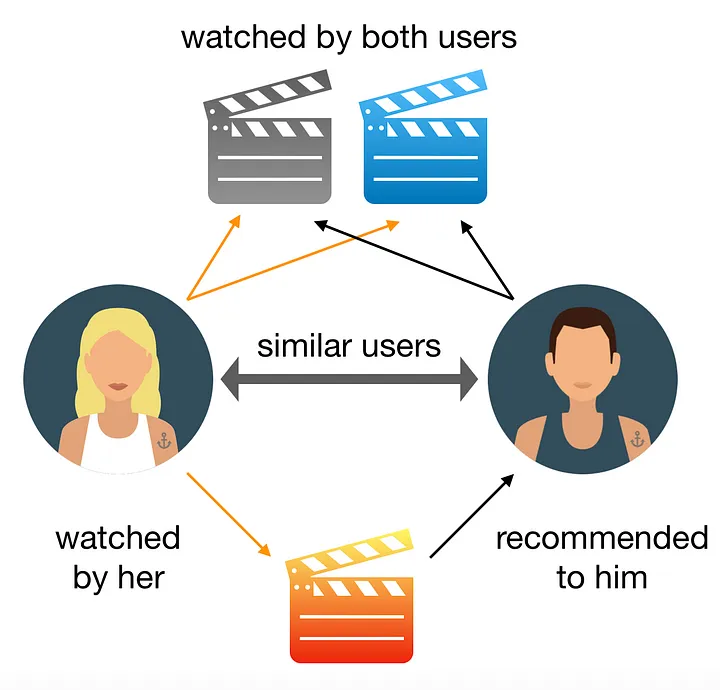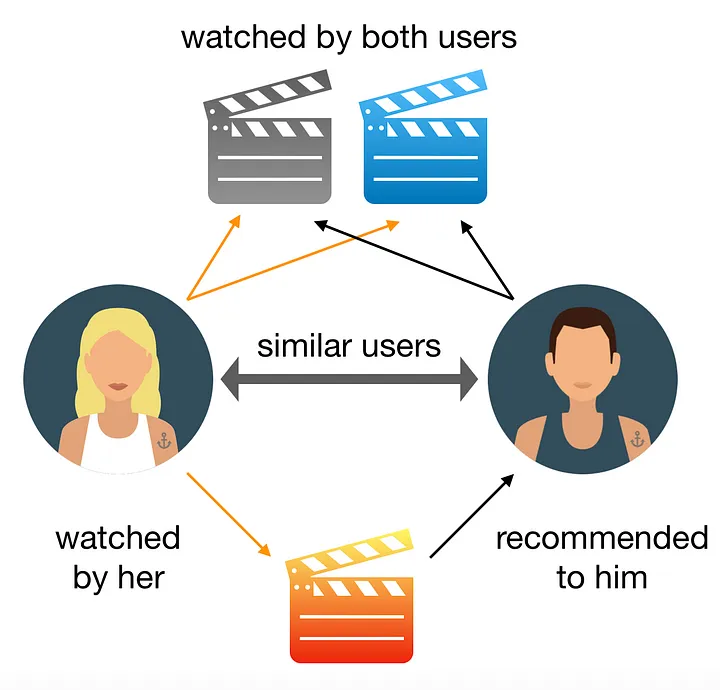

In [69]:
# merge the data with relevant features to use
merged_data = genome_scores.merge(genome_tags, on='tagId', how='left')
merged_data = merged_data.merge(imdb_data, on='movieId', how='left')
merged_data = merged_data.merge(links, on='movieId', how='left')
merged_data = merged_data.merge(movies, on='movieId', how='left')

In [70]:
# Drop null values on director, genres and plot_keywords and check th shape
usable_data = merged_data.dropna(subset=['director', 'genres','plot_keywords'])
usable_data.shape

(9140184, 14)

In [71]:
# drop duplicates so to use uniquue movie Id for the user
usable_data = usable_data.drop_duplicates(subset='movieId', keep='first')
usable_data.shape

(8103, 14)

In [72]:
#  create a new column called 'combine' in the dataframe 'usable_data'. This new column concatenates the values from three existing columns ('director', 'genres', and 'plot_keywords').
usable_data['combine'] = usable_data[['director', 'genres','plot_keywords']].fillna('').apply(lambda x: ' '.join(filter(None, x)), axis=1)

In [73]:
# Remove any pipelines in the data and join the contents using spaces.
usable_data['combine'] = usable_data['combine'].apply(lambda x: ' '.join(x.split('|')))


In [74]:
# Reset the index back to its original order
usable_data.reset_index(drop=True, inplace=True)

In [75]:
# create a matrix
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.02, stop_words='english')
tf_sim_matrix = tf.fit_transform(usable_data['combine'])

In [76]:
# Apply cosine similarity function to the matrix
cosine_sim_matrix = cosine_similarity(tf_sim_matrix, 
                                        tf_sim_matrix)
print(cosine_sim_matrix.shape)

(8103, 8103)


In [77]:
movies = usable_data['movieId']
indices = pd.Series(usable_data.index, index=usable_data['movieId'])
indices

movieId
1            0
2            1
3            2
4            3
5            4
          ... 
131168    8098
131170    8099
131237    8100
131248    8101
131252    8102
Length: 8103, dtype: int64

In [78]:
trained = pd.merge(train[['userId', 'movieId', 'rating','timestamp']], usable_data['movieId'], on='movieId', how='inner')
trained.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1970-01-18 13:45:49.992
1,87388,57669,3.5,1970-01-15 07:44:15.297
2,137050,57669,4.0,1970-01-17 12:00:31.854
3,120490,57669,4.5,1970-01-17 07:10:28.517
4,50616,57669,4.5,1970-01-17 17:55:41.640


In [79]:
def content_generate_rating_estimate(movie_Id, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_Id]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cosine_sim_matrix[b_idx-1, indices[row['movieId']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['movieId']==movie_Id]['rating'])
    return predictedRating

In [80]:
content_generate_rating_estimate(movie_Id=10,user=151449,rating_data=trained)

3.9430306935926924

### Recommending movies

In [81]:
def content_generate_top_N_recommendations(movie_Id, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_Id]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_matrix[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return movies.iloc[movie_indices]

In [82]:
# Recommending the top 8 movies 
content_generate_top_N_recommendations(3,N=8)

62      64
117    122
124    129
168    180
272    289
277    295
338    357
Name: movieId, dtype: int64

In [83]:
usable_data.iloc[117]

movieId                                                        122
tagId                                                            1
relevance                                                    0.073
tag                                                            007
title_cast       Eddie Murphy|Robin Givens|Halle Berry|David Al...
director                                        Barry W. Blaustein
runtime                                                      117.0
budget                                                 $42,000,000
plot_keywords    advertising executive|african american protago...
imdbId                                                      103859
tmdbId                                                     11066.0
title                                             Boomerang (1992)
genres                                              Comedy|Romance
year                                                          1992
combine          Barry W. Blaustein Comedy Romance advertising

<a id="five"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">8. KAGGLE SUBMISSION</p>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [84]:
# Kaggl submission for SVD model
my_submission_2 = pd.DataFrame({'Id': test.Id, 
                              'rating': test.ratings_SVD} 
                            )
my_submission_2.to_csv('submission.csv', index=False)

<a id="five"></a>
## <p style="background-color:#edbd98;font-family:TimesNewRoman;color:#2b1582;font-size:150%;text-align:center;border-radius:15px 15px;">9. CONCLUSION</p>
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Throughout this notebook we have taken a comprehensive look at the data in order to gain insights and assist us in predicting ratings as well as building recommendation systems.

For Both the collaborative and content-based filtering we implemented a few models. We did thorough research to identify the best performing model for collaborative filtering and found that Singular value decomposition is the most prefered algorithm. we implimented it and evaluated its performance using the RMSE, which we found to be 0.82.

The SVD performed better since it is very good at noise detection and does this by reducing the dimensions of a matrix in order to make certain subsequent matrix calculations simpler. we can conclude that the algorithm implemented for our app is very good at movie recommendations. 

**Proposed Ideas**  In future we propose to explore more libraries and more complex approach to the problems associated with recommender systems such as the cold start problem. Although svd can be used to mitigate against this but a more extensive and hybrid approach will be used. 